In [39]:
import requests
import json
import pandas as pd
import numpy as np
import math
import config
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Weather Data

In [69]:
nyc_lat = 40.7128
nyc_long = -74.0060
years = list(range(2013, 2019))
months = ['07', '12']
days = list(range(1, 32))

all_dates = []
for year in years:
    for month in months:
        for day in days:
            if day < 10:
                str_day = '0' + str(day)
            else:
                str_day = str(day)
            all_dates.append(str(year) + '-' + month + '-' + str_day + 'T23:59:59')

In [94]:
nyc_data = []
for date in all_dates:
    url = f'https://api.darksky.net/forecast/{darksky_api_key}/{lat},{long},{date}?exclude=currently,hourly'
    response = requests.request('GET', url, allow_redirects=False)
    
    # turns each response into a dataframe
    date_info = pd.DataFrame(json.loads(response.text)['daily']['data'])
    
    # adds date and location to each dataframe
    date_info['DATE'] = date
    date_info['CITY'] = 'NEW YORK'
    
    # appends each dataframe to a list
    nyc_data.append(date_info)
    
# concats list of dataframes into one dataframe    
nyc_data = pd.concat(nyc_data)

# saves dataframe as .csv
nyc_data.to_csv('nyc_weather_2013_2018.csv')

/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [108]:
nyc_data = pd.read_csv('nyc_weather_2013_2018.csv')

In [9]:
nyc_data

,Unnamed: 0,CITY,DATE,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,0,NEW YORK,2013-07-01T23:59:59,77.29,1372683540,74.73,1372749120,77.29,1372683540,74.78,...,73.00,1372671540,1372651200,5,1372697100,5.383,168,9.41,1372686960,2.32
1,0,NEW YORK,2013-07-02T23:59:59,88.16,1372792020,73.66,1372842780,88.16,1372792020,74.73,...,72.88,1372749060,1372737600,5,1372790940,6.488,186,9.06,1372813080,2.95
2,0,NEW YORK,2013-07-03T23:59:59,91.00,1372884960,76.64,1372931040,91.00,1372884960,73.66,...,72.02,1372843020,1372824000,6,1372867500,6.717,203,8.26,1372872960,2.34
3,0,NEW YORK,2013-07-04T23:59:59,96.72,1372966860,75.96,1373017860,96.72,1372966860,76.64,...,74.60,1372931100,1372910400,8,1372957380,6.644,222,10.79,1372974720,3.13
4,0,NEW YORK,2013-07-05T23:59:59,98.22,1373052960,78.00,1373104080,98.22,1373052960,75.96,...,74.13,1373017920,1372996800,9,1373041860,6.913,227,11.33,1373058420,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,NEW YORK,2018-12-27T23:59:59,42.84,1545932460,35.94,1545961500,42.84,1545932460,31.46,...,35.12,1545914280,1545886800,2,1545929700,9.718,90,8.34,1545922980,4.25
368,0,NEW YORK,2018-12-28T23:59:59,56.91,1546041600,50.65,1546079040,56.91,1546041780,38.37,...,41.78,1545973200,1545973200,2,1546016280,5.751,180,13.22,1546019460,5.75
369,0,NEW YORK,2018-12-29T23:59:59,51.81,1546084860,32.03,1546163940,55.32,1546059600,35.18,...,39.53,1546142400,1546059600,2,1546102080,9.588,299,21.36,1546117080,8.57
370,0,NEW YORK,2018-12-30T23:59:59,38.31,1546211940,31.16,1546260300,38.31,1546211940,31.75,...,33.52,1546228800,1546146000,1,1546189380,9.539,72,5.14,1546149240,2.93


## Flight Data

In [95]:
NYC_LA_MIA_201812 = pd.read_csv('nyc_2018_12.csv')
NYC_LA_MIA_201812 = NYC_LA_MIA_201812[(NYC_LA_MIA_201812['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201812['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201812['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201807 = pd.read_csv('nyc_2018_07.csv')
NYC_LA_MIA_201807 = NYC_LA_MIA_201807[(NYC_LA_MIA_201807['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201807['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201807['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201712 = pd.read_csv('nyc_2017_12.csv')
NYC_LA_MIA_201712 = NYC_LA_MIA_201712[(NYC_LA_MIA_201712['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201712['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201712['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201707 = pd.read_csv('nyc_2017_07.csv')
NYC_LA_MIA_201707 = NYC_LA_MIA_201707[(NYC_LA_MIA_201707['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201707['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201707['DEST_CITY_NAME'] == 'Miami, FL'))]
#####
NYC_LA_MIA_201612 = pd.read_csv('nyc_2016_12.csv')
NYC_LA_MIA_201612 = NYC_LA_MIA_201612[(NYC_LA_MIA_201612['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201612['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201612['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201607 = pd.read_csv('nyc_2016_07.csv')
NYC_LA_MIA_201607 = NYC_LA_MIA_201607[(NYC_LA_MIA_201607['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201607['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201607['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201512 = pd.read_csv('nyc_2015_12.csv')
NYC_LA_MIA_201512 = NYC_LA_MIA_201512[(NYC_LA_MIA_201512['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201512['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201512['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201507 = pd.read_csv('nyc_2015_07.csv')
NYC_LA_MIA_201507 = NYC_LA_MIA_201507[(NYC_LA_MIA_201507['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201507['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201507['DEST_CITY_NAME'] == 'Miami, FL'))]
#####
NYC_LA_MIA_201412 = pd.read_csv('nyc_2014_12.csv')
NYC_LA_MIA_201412 = NYC_LA_MIA_201412[(NYC_LA_MIA_201412['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201412['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201412['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201407 = pd.read_csv('nyc_2014_07.csv')
NYC_LA_MIA_201407 = NYC_LA_MIA_201407[(NYC_LA_MIA_201407['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201407['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201407['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201312 = pd.read_csv('nyc_2013_12.csv')
NYC_LA_MIA_201312 = NYC_LA_MIA_201312[(NYC_LA_MIA_201312['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201312['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201312['DEST_CITY_NAME'] == 'Miami, FL'))]
NYC_LA_MIA_201307 = pd.read_csv('nyc_2013_07.csv')
NYC_LA_MIA_201307 = NYC_LA_MIA_201307[(NYC_LA_MIA_201307['ORIGIN_CITY_NAME'] == 'New York, NY') &
                                      ((NYC_LA_MIA_201307['DEST_CITY_NAME'] == 'Los Angeles, CA') | 
                                      (NYC_LA_MIA_201307['DEST_CITY_NAME'] == 'Miami, FL'))]

nyc_12flights = pd.concat([NYC_LA_MIA_201812, NYC_LA_MIA_201712, NYC_LA_MIA_201612,
                           NYC_LA_MIA_201512, NYC_LA_MIA_201412, NYC_LA_MIA_201312])
nyc_07flights = pd.concat([NYC_LA_MIA_201807, NYC_LA_MIA_201707, NYC_LA_MIA_201607, 
                           NYC_LA_MIA_201507, NYC_LA_MIA_201407, NYC_LA_MIA_201307])

In [97]:
nyc_12flights.to_csv('nyc_12flights.csv')
nyc_07flights.to_csv('nyc_07flights.csv')

In [98]:
nyc_12flights = pd.read_csv('nyc_12flights.csv')
nyc_07flights = pd.read_csv('nyc_07flights.csv')

## SQL Import

In [398]:
import mysql.connector
import config
dbname = 'FLIGHTS'

cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = dbname
)

config.host
cursor = cnx.cursor()

In [99]:
nyc_12flights_sql = nyc_12flights[['FL_DATE', 'ORIGIN', 'ORIGIN_CITY_NAME', 
                                     'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 
                                     'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
                                     'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'TAXI_IN', 
                                     'WHEELS_ON', 'CANCELLED', 'CANCELLATION_CODE', 
                                     'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
                                     'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 
                                     'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
nyc_07flights_sql = nyc_07flights[['FL_DATE', 'ORIGIN', 'ORIGIN_CITY_NAME', 
                                     'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 
                                     'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
                                     'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'TAXI_IN', 
                                     'WHEELS_ON', 'CANCELLED', 'CANCELLATION_CODE', 
                                     'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
                                     'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 
                                     'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
na_dict = {math.nan: None}
nyc_12flights_sql = nyc_12flights_sql.replace(na_dict)
nyc_12flights_sql.head()
na_dict = {np.nan: None}
nyc_07flights_sql = nyc_07flights_sql.replace(na_dict)
nyc_07flights_sql.head()


In [103]:
nyc_12flights_tuples = [tuple(x) for x in nyc_12flights_sql.values]
nyc_07flights_tuples = [tuple(x) for x in nyc_07flights_sql.values]

In [64]:
def db_insert(data):
    insert_statement = "INSERT INTO FLIGHTS.FLIGHTS (date, origin, origin_city, dest, dest_city, dep_time_crs, dep_time_act, dep_delay, taxi_out, wheels_off, arr_time_crs, arr_time_act, arr_delay, taxi_in, wheels_on, cancelled, cancel_code, diverted, elapsed_time_crs, elapsed_time_act, air_time, carrier_delay, weather_delay, nas_delay, sec_delay, late_delay) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    cursor.executemany(insert_statement, data)
    cnx.commit()

In [399]:
db_insert(nyc_12flights_tuples)
db_insert(nyc_07flights_tuples)

In [138]:
nyc_data_sql = nyc_data[['DATE', 'CITY', 
                          'temperatureHigh', 'temperatureLow', 
                          'cloudCover', 'dewPoint', 'humidity', 
                          'precipIntensity', 'precipProbability', 
                          'precipType', 'pressure', 'uvIndex', 
                          'visibility', 'windBearing', 
                          'windGust', 'windSpeed']]
nyc_data_sql.DATE.replace(list(nyc_data_sql['DATE']), 
                                  [x.replace('T23:59:59', '') for x in nyc_data_sql['DATE']], 
                                  inplace = True)
nyc_data_sql.CITY.replace(['NEW YORK'], ['New York, NY'], inplace = True)

In [147]:
na_dict = {np.nan: None}
nyc_data_sql = nyc_data_sql.replace(na_dict)
nyc_data_sql.head()


,DATE,CITY,temperatureHigh,temperatureLow,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipType,pressure,uvIndex,visibility,windBearing,windGust,windSpeed
0,2013-07-01,"New York, NY",76.39,72.88,0.97,71.50,0.90,0.0324,0.96,rain,1014.4,5,5.383,168,9.41,2.32
1,2013-07-02,"New York, NY",82.96,72.02,0.83,71.95,0.85,0.0016,0.49,rain,1019.4,5,6.488,186,9.06,2.95
2,2013-07-03,"New York, NY",84.32,74.60,0.54,71.98,0.83,0.0010,0.37,rain,1022.7,6,6.717,203,8.26,2.34
3,2013-07-04,"New York, NY",89.78,74.13,0.50,72.72,0.75,0.0000,0.00,None,1022.7,8,6.644,222,10.79,3.13
4,2013-07-05,"New York, NY",91.17,76.14,0.20,71.69,0.70,0.0000,0.00,None,1021.3,9,6.913,227,11.33,3.19


In [148]:
nyc_data_tuples = [tuple(x) for x in nyc_data_sql.values]

In [159]:
def db_insert_weather(data):
    insert_statement = """INSERT INTO FLIGHTS.WEATHER (date, city_name, max_temp, min_temp, cloud_cover, 
                            dew_point, humidity, precip_intens, precip_prob, precip_type, pressure, uv_index, 
                            visibility, windbearing, wind_gust, windspeed) VALUES (%s, %s, %s, %s, %s, %s, %s, 
                            %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
    cursor.executemany(insert_statement, data)
    cnx.commit()

In [162]:
db_insert_weather(nyc_data_tuples)

In [163]:
cnx.close()

## Visualization

In [167]:
cursor.execute('''SELECT * FROM FLIGHTS.FLIGHTS''')
flights_data = cursor.fetchall()
flights_df = pd.DataFrame(flights_data)
flights_df.shape

field_names = [i[0] for i in cursor.description]
flights_df.columns = field_names


In [285]:
cursor.execute('''SELECT * FROM FLIGHTS.WEATHER''')
weather_data = cursor.fetchall()
weather_df = pd.DataFrame(weather_data)

field_names = [i[0] for i in cursor.description]
weather_df.columns = field_names

In [290]:
flights_and_weather = pd.merge(flights_df, weather_df,  how = 'left', left_on=['date','origin_city'], right_on = ['date','city_name'])
flights_and_weather = flights_and_weather.fillna(value = {'precip_type': 'No Precipitation'})

In [198]:
flights_df.head()

,flight_id,date,origin,origin_city,dest,dest_city,dep_time_crs,dep_time_act,dep_delay,taxi_out,...,cancel_code,diverted,elapsed_time_crs,elapsed_time_act,air_time,carrier_delay,weather_delay,nas_delay,sec_delay,late_delay
0,1,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",800,756.0,-4.0,19.0,...,None,0.0,391.0,369.0,344.0,NaN,NaN,NaN,NaN,NaN
1,2,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1200,1154.0,-6.0,16.0,...,None,0.0,376.0,363.0,332.0,NaN,NaN,NaN,NaN,NaN
2,3,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1530,1528.0,-2.0,22.0,...,None,0.0,388.0,375.0,340.0,NaN,NaN,NaN,NaN,NaN
3,4,2018-12-01,JFK,"New York, NY",MIA,"Miami, FL",1530,1527.0,-3.0,19.0,...,None,0.0,204.0,253.0,153.0,0.0,0.0,46.0,0.0,0.0
4,5,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1000,953.0,-7.0,39.0,...,None,0.0,378.0,396.0,350.0,NaN,NaN,NaN,NaN,NaN


In [294]:
flights_and_weather.head()

,flight_id,date,origin,origin_city,dest,dest_city,dep_time_crs,dep_time_act,dep_delay,taxi_out,...,humidity,precip_intens,precip_prob,precip_type,pressure,uv_index,visibility,windbearing,wind_gust,windspeed
0,1,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",800,756.0,-4.0,19.0,...,1,0.0011,0.93,rain,1022,2,9.663,78,5.51,2.87
1,2,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1200,1154.0,-6.0,16.0,...,1,0.0011,0.93,rain,1022,2,9.663,78,5.51,2.87
2,3,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1530,1528.0,-2.0,22.0,...,1,0.0011,0.93,rain,1022,2,9.663,78,5.51,2.87
3,4,2018-12-01,JFK,"New York, NY",MIA,"Miami, FL",1530,1527.0,-3.0,19.0,...,1,0.0011,0.93,rain,1022,2,9.663,78,5.51,2.87
4,5,2018-12-01,JFK,"New York, NY",LAX,"Los Angeles, CA",1000,953.0,-7.0,39.0,...,1,0.0011,0.93,rain,1022,2,9.663,78,5.51,2.87


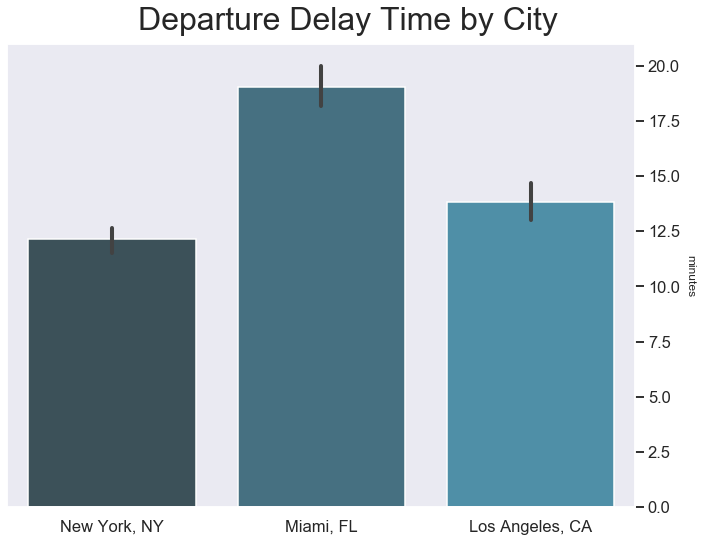

In [393]:
sns.set(style='dark', context='talk')
palette = sns.color_palette("GnBu_d")

f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Departure Delay Time by City', ha='center', fontsize=32)
ax = sns.barplot(x='origin_city', y='dep_delay', data=flights_df, palette=palette)
ax.set_xlabel('')
ax.set_ylabel('minutes', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
f.tight_layout(rect=[0, 0.03, 1, 0.95])


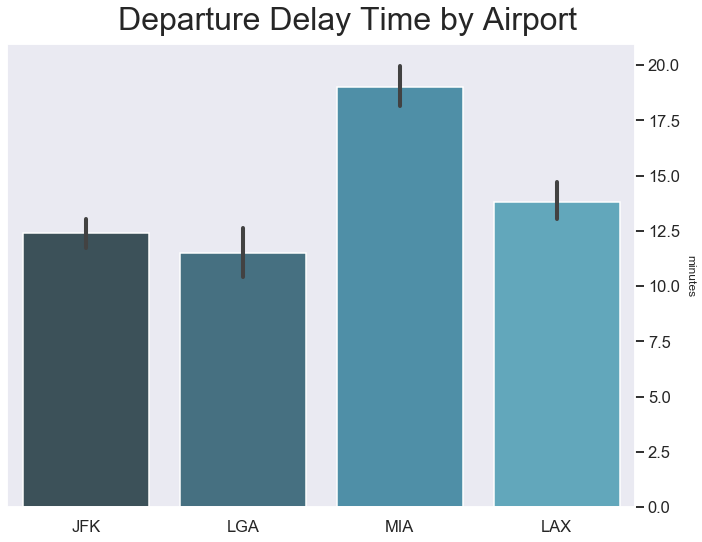

In [394]:
f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Departure Delay Time by Airport', ha='center', fontsize=32)
ax = sns.barplot(x='origin', y='dep_delay', data=flights_df, palette=palette)
ax.set_xlabel('')
ax.set_ylabel('minutes', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
f.tight_layout(rect=[0, 0.03, 1, 0.95])

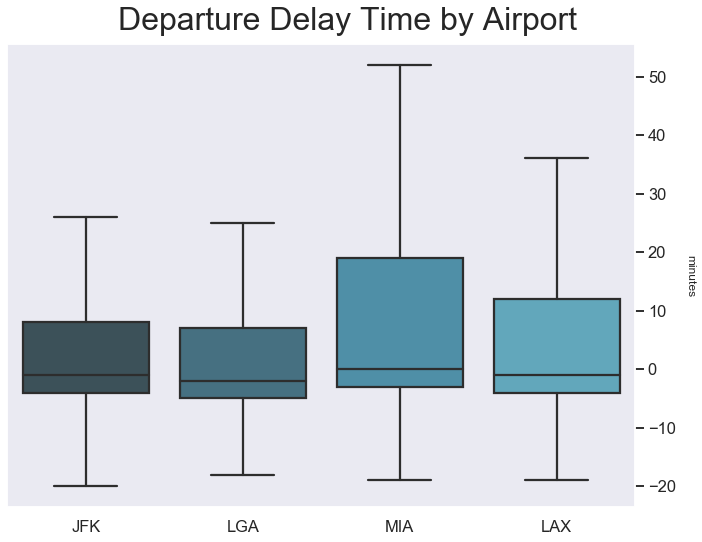

In [400]:
f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Departure Delay Time by Airport', ha='center', fontsize=32)
ax = sns.boxplot(x='origin', y='dep_delay', data=flights_df, palette=palette, showfliers=False)
ax.set_xlabel('')
ax.set_ylabel('minutes', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
f.tight_layout(rect=[0, 0.03, 1, 0.95])

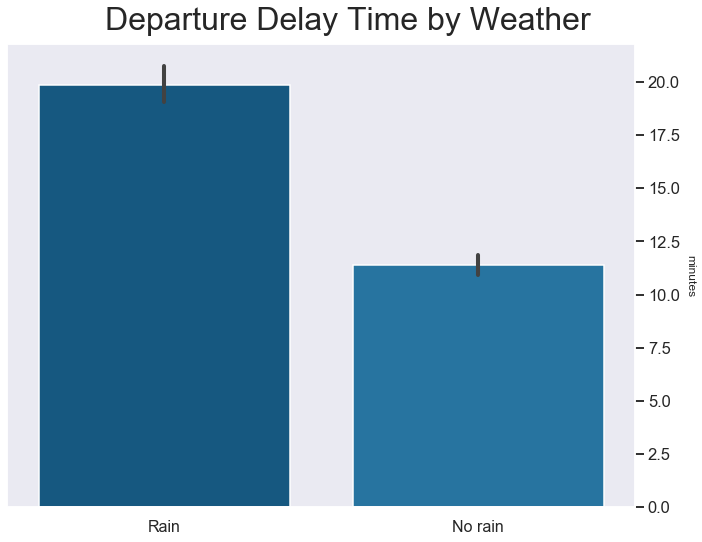

In [397]:
f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Departure Delay Time by Weather', ha='center', fontsize=32)

rainpalette = sns.color_palette('PuBu_r')
ax = sns.barplot(x='precip_type', y='dep_delay', 
                 data=flights_and_weather[(flights_and_weather['precip_type'] != 'snow') & 
                                          (flights_and_weather['precip_type'] != 'sleet')], 
                 palette=rainpalette)
ax.set_xlabel('')
ax.set_xticklabels(['Rain', 'No rain'], fontsize=16)
ax.set_ylabel('minutes', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
f.tight_layout(rect=[0, 0.03, 1, 0.95])

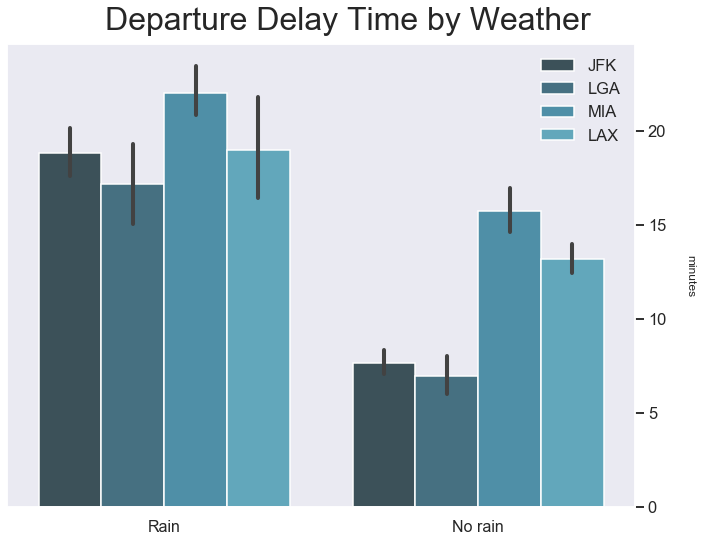

In [401]:
f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Departure Delay Time by Weather', ha='center', fontsize=32)

ax = sns.barplot(x='precip_type', y='dep_delay', 
                 data=flights_and_weather[(flights_and_weather['precip_type'] != 'snow') & 
                                          (flights_and_weather['precip_type'] != 'sleet')], 
                 hue='origin', palette=palette)
ax.set_xlabel('')
ax.set_xticklabels(['Rain', 'No rain'], fontsize=16)
ax.set_ylabel('minutes', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
ax.legend(title='', frameon=False)
f.tight_layout(rect=[0, 0.03, 1, 0.95])